# Project: Investigate a Dataset (No-Show Appointments)

## Presented by: Paula Muñoz

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Throughout this project I will be exploring and analyzing the **No-Show Appointments** dataset, which provides information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

Original Data Source published by [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments/home)

### Data Dictionary

**PatientId** - Identification of a patient 

**AppointmentID** - Identification of each appointment

**Gender** - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

**ScheduledDay** - The day of the actual appointment, when they have to visit the doctor. 

**AppointmentDay** - The day someone called or registered the appointment, this is before appointment of course. 

**Age** - How old is the patient.

**Neighbourhood** - Where the appointment takes place. 

**Scholarship** - True of False. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia 

**Hipertension** - True or False 

**Diabetes** - True or False 

**Alcoholism** - True or False 

**Handcap** - True or False 

**SMS_received** - 1 or more messages sent to the patient. 

**No-show** - True or False. 


### Questions I plan to explore :

**-** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

The factors I'm going to explore along No-show variable are:

Gender, ScheduledDay (Month, Day of the week, hour), Age and SMS_received.


<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

Importing libraries and loading the data



In [79]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

#Load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


### Assessing the data

Using Pandas to make quick assessment of the dataset.

In [80]:
#Checking the first five rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [81]:
#Checking Dimensions of dataframe
df.shape

(110527, 14)

In [82]:
#Checking Summary of dataframe as well as number of non-Null values and Datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [83]:
#Checking Summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [84]:
#Checking the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [85]:
#Checking for duplicates
sum(df.duplicated())

0

### Data Cleaning

From the preliminary assessment, I can say that data is for the most part clean as no NULL values and no DUPLICATE values were found.

I will correct some typos found on column names, as well as modify datypes for some variables to facilitate the analysis

#### Correcting Column Names

I will be modifying the following column names:

**Neighbourhood** ---> Neighborhood

**Hipertension** ---> Hypertension	

**Handcap** ---> Handicap

**No-show** ---> Show_No_Show (Just foe easier understanding)

In [86]:
#Using rename function to update column names

df.rename(columns ={'Neighbourhood': 'Neighborhood','Hipertension': 'Hypertension', 'Handcap':'Handicap', 'No-show': 'Show_No_Show'}, inplace=True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Changing Data Types

I will be modifying the data type for the following columns:

**PatientId** - From Float to String, since this is an ID and no mathematical operations are needed 

**AppointmentID** - From Integer to String, since this is an ID and no mathematical operations are needed 

**ScheduledDay** From string to datetime

**AppointmentDay** - From string to datetime


For **Handicap** variable, per data dictionary the options should be TrUe or False, however the data includes responses: 0,1,2,3,4. Further research on the web it was found that the handicap variable refers to the number of desabilites a person has.


In [87]:
#Modifying Datatypes

df['PatientId'] = df['PatientId'].astype('str')

df['AppointmentID'] = df['AppointmentID'].astype('str')

#Convert ScheduledDay and AppointmentDay from string to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [88]:
#Checking value counts for Handicap variable

df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

### Removing invalid values

For **Age** Variable, a minimum value of -1 was identified, thus it will be removed from the analysis... Some additional values over 100 were identified as well, initially I will leave this values on dataset, but it is possible that further in my analysis I may remove them.

In [89]:
#Checking Age variable

df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [90]:
#Correcting Age variable and removing minimum value of -1

df = df[df.Age > -1]

### Adding Additional Columns related to ScheduleDay 

We have converted ScheduledDay to Datetime, and I will add additional columns such as **ScheduledMonth**, **ScheduledDOW**, and **ScheduledHour** to see if either Month, day of the week or hour of the appoinment are important factors to predict if patients would show to the appointment


In [91]:
#Add column to get the Month
df['ScheduledMonth'] = df['ScheduledDay'].dt.month

#Add column to get the Day of The Week
df['ScheduledDOW'] = df['ScheduledDay'].dt.weekday_name

#Add column to get the Hour
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

In [92]:
#Inspecting data after data cleaning
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighborhood      110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
Show_No_Show      110526 non-null object
ScheduledMonth    110526 non-null int64
ScheduledDOW      110526 non-null object
ScheduledHour     110526 non-null int64
dtypes: datetime64[ns](2), int64(9), object(6)
memory usage: 15.2+ MB


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ScheduledMonth,ScheduledHour
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,4.823860,10.774542
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.715795,3.216192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,8.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,12.000000,21.000000


<a id='eda'></a>
## Exploratory Data Analysis

Now that data has been cleaned up, I'm ready to move on to the exploration phase, I will be initially using histograms and scatter plots to have a quick overview of the data, then I will move on to take a look at each variable individually and answer some specific questions.


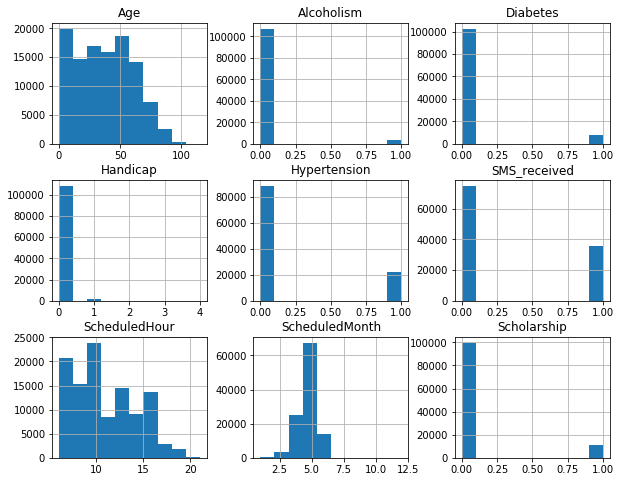

In [93]:
# Plotting Histograms of all variables in the dataframe
df.hist(figsize =(10,8));



### Dividing dataset between show and no_show 

To better be able to explore the data and answer some questions I will divide the data set into Patients that showed up to the appointement (**show**), and patients that didn't showed up (**no_show**).


In [94]:
# Dividing dataset in two:
show = df[df.Show_No_Show == 'Yes']

no_show = df[df.Show_No_Show == 'No']


In [95]:
#Inspecting showed data
show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_No_Show,ScheduledMonth,ScheduledDOW,ScheduledHour
6,7.33688164477e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,4,Wednesday,15
7,3.44983339412e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,4,Wednesday,15
11,7.54295136844e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,4,Tuesday,8
17,1.47949661912e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,4,Thursday,9
20,6.22257462899e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,4,Wednesday,7


In [96]:
#Inspecting showed data
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_No_Show,ScheduledMonth,ScheduledDOW,ScheduledHour
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,18
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,16
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,Friday,16
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday,17
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday,16


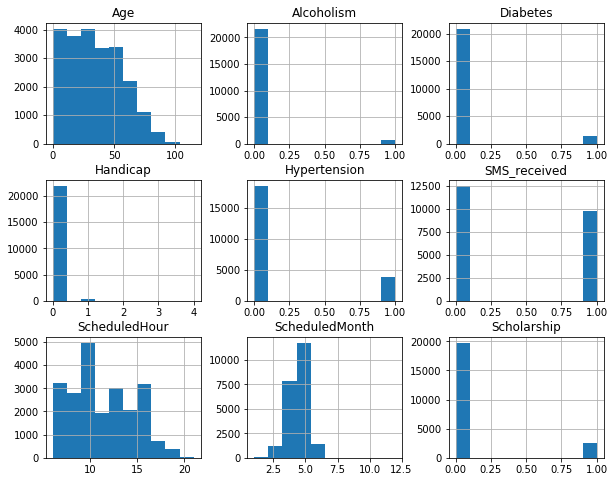

In [97]:
# Plotting Histograms again for Show dataframe
show.hist(figsize =(10,8));


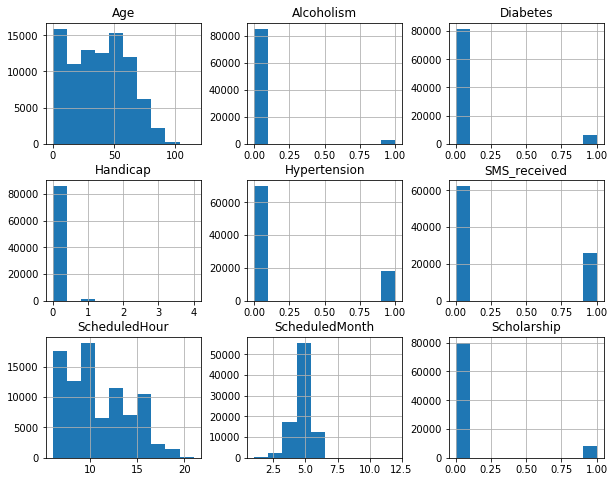

In [98]:
# Plotting Histograms again for no_show dataframe
no_show.hist(figsize =(10,8));


By looking at the various **show** histograms above, It looks like the more we send an SMS to patients, the more likely they are to show up to the appointment... I will investigate this variable later on.



### Research Question 1: What is the ratio of  show vs no-show appointments?

In [99]:
# Checking show vs no_show value counts

df['Show_No_Show'].value_counts()

No     88207
Yes    22319
Name: Show_No_Show, dtype: int64

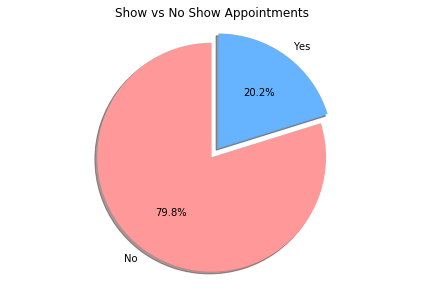

In [100]:
# plotting Pie Chart of show vs no_show appointments

labels = ['No', 'Yes']
sizes = df['Show_No_Show'].value_counts()

# only "explode" the 2nd slice (i.e. 'Yes')
explode = (0, 0.1)  

#add colors
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Show vs No Show Appointments')
plt.show()


By looking at the Pie chart we can see that only **20.2%** of patients showed up to the appointments, this is quiet concerning.




### Research Question 2: Is Gender an important factor  to predict if a patient will show up to their scheduled appointment? Are Female more likely to show up to the appointments than Men? 

Let's first take a look at the total number of Female vs Male Entries in our data

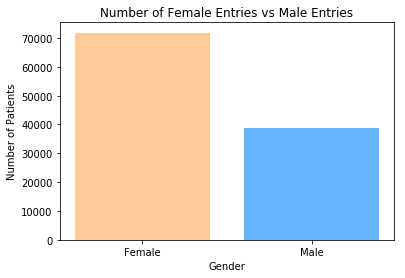

In [101]:
# Plotting bar chart Gender_counts
Gender_counts =df['Gender'].value_counts()
colors = ['#ffcc99', '#66b3ff']
plt.bar(["Female", "Male"], Gender_counts, color=colors)
plt.title("Number of Female Entries vs Male Entries")
plt.xlabel("Gender")
plt.ylabel("Number of Patients");


From the bar chart we can see that there is almost double the number of Female entries compared to Male entries.

However I'm going to inspect **PatientId** variable since it is possible that the same Patient has multiple appointments

In [102]:
#Inspecting PatientId Variable

df['PatientId'].describe()

count                110526
unique                62298
top       8.22145925426e+14
freq                     88
Name: PatientId, dtype: object

Out of the **110,526** Entries, only **62,298** PatientIDs are unique, **Let's inspect the Ratio of Unique Female Patients vs Male Patients**

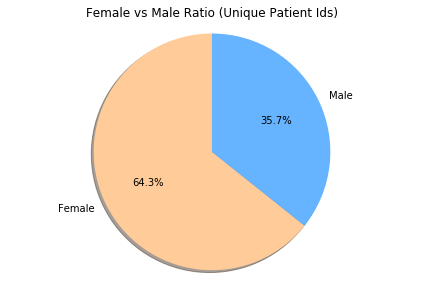

In [103]:
#Continuing to inspect PatientId, checking the Ratio of Unique Female Patients vs Male Patients

Unique_F = df.query('Gender in ["F"]').PatientId.nunique()
Unique_M = df.query('Gender in ["M"]').PatientId.nunique()

labels = ['Female', 'Male']
sizes = (Unique_F,Unique_M)


#add colors
colors = ['#ffcc99','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Female vs Male Ratio (Unique Patient Ids)')
plt.show()

By looking at the unique **PatientId**, We can still see that Female Patients Ratio is higher (64.3%) than Male (35.7%)

#### Now let's go even further and check the Gender Ratio for Patients that showed up to their appointment

In [104]:
# Checking Gender in show dataframe:
show['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

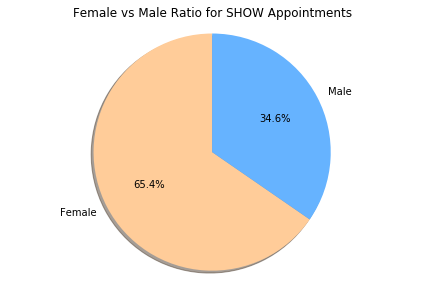

In [105]:
# plotting Pie Chart of Female vs Male Ratio for Show Appointments
labels = ['Female', 'Male']
sizes = show['Gender'].value_counts()


#add colors
colors = ['#ffcc99','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Female vs Male Ratio for SHOW Appointments')
plt.show()


#### Checking Gender Ratio for Patients that did NOT showed up to their appointment

In [106]:
# Checking if Gender in No Show dataframe

no_show['Gender'].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

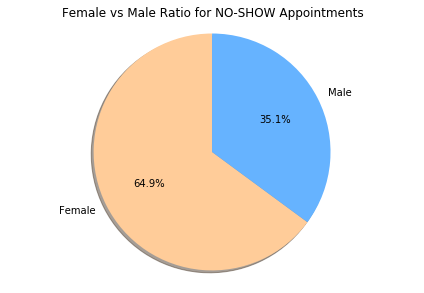

In [107]:
# plotting Pie Chart of Female vs Male Ratio for NO -Show Appointments
labels = ['Female', 'Male']
sizes = no_show['Gender'].value_counts()


#add colors
colors = ['#ffcc99','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Female vs Male Ratio for NO-SHOW Appointments')
plt.show()



After inspecting the **Gender** variable and doing different type of explorations, I do not see a clear indication that Gender is an import factor to predict if Patients would show to their appointments or no.

The only thing we can clearly see from this dataset is that the ratio of Female Patients is higher than Male Patients, but not necesarily this means that Female are more likely to go their appointments than Male, since the Female/ Male Ratio for both Show and No-Show appointments are very similar:

**Show Ratio:** 65.4% F vs 34.6% M

**No-Show Ratio:** 64.9% F vs 35.1% M

### Research Question 3: Are ScheduleDay (Month, Day of the Week or Hour) important factors  to predict if a patient will show up to their scheduled appointment? 

#### Inspecting ScheduledMonth

In [108]:
#Inspecting ScheduleMonth variable
#Using crosstab to get the count of Show/ No Show per Month
s_n_s_Month = pd.crosstab( df.ScheduledMonth, df.Show_No_Show)

#Calculating Percent of No_Show
s_n_s_Month['%_No_Show'] = s_n_s_Month['No']/( s_n_s_Month['No'] +  s_n_s_Month['Yes']) 
s_n_s_Month

Show_No_Show,No,Yes,%_No_Show
ScheduledMonth,,,
1,42,18,0.700000
2,199,82,0.708185
3,2418,1196,0.669065
4,17490,7849,0.690240
5,55652,11769,0.825440
6,12363,1386,0.899193
11,1,0,1.000000
12,42,19,0.688525


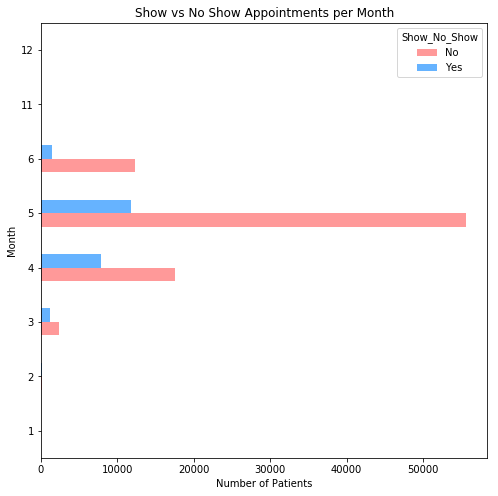

In [109]:
#Plotting the count of Show vs No_Shows per Month
pd.crosstab( df.ScheduledMonth, df.Show_No_Show)

colors = ['#ff9999','#66b3ff']
pd.crosstab( df.ScheduledMonth, df.Show_No_Show).plot(kind='barh', color=colors, figsize=(8,8))
plt.title('Show vs No Show Appointments per Month')
plt.ylabel("Month")
plt.xlabel("Number of Patients")
plt.show()



By looking at the percent of No show appointments per month, May(5) and June(6) are the months with the most NO show percent rate

#### Inspecting ScheduledDOW (Day of the Week)

In [110]:
#Inspecting ScheduleDOW variable
#Using crosstab to get the count of Show/ No Show per Day of the Week
s_n_s_DOW = pd.crosstab( df.ScheduledDOW, df.Show_No_Show)

#Calculating Percent of No_Show
s_n_s_DOW['%_No_Show'] = s_n_s_DOW['No']/( s_n_s_DOW['No'] +  s_n_s_DOW['Yes']) 
s_n_s_DOW

Show_No_Show,No,Yes,%_No_Show
ScheduledDOW,,,
Friday,15028,3887,0.794502
Monday,18523,4561,0.802417
Saturday,23,1,0.958333
Thursday,14373,3700,0.795275
Tuesday,20877,5291,0.797806
Wednesday,19383,4879,0.798904


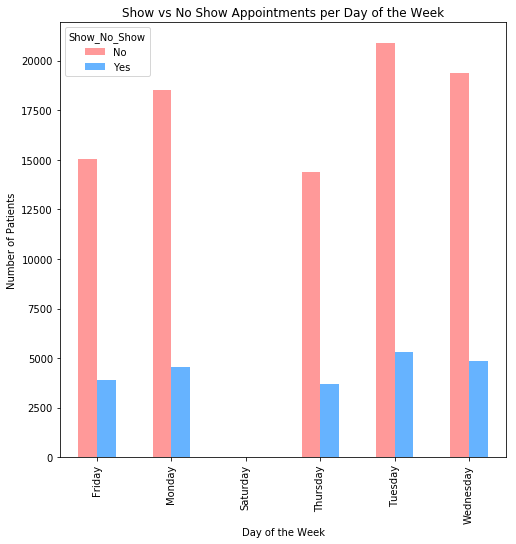

In [111]:
#Plotting the count of Show vs No_Shows per Day of the Week

colors = ['#ff9999','#66b3ff']
pd.crosstab( df.ScheduledDOW, df.Show_No_Show).plot(kind='bar', color=colors, figsize=(8,8))
plt.title('Show vs No Show Appointments per Day of the Week')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Patients")
plt.show()


By looking at the percent of No show appointments per Day of the Week, Monday and Saturday are the days with the most NO show percent rate

#### Inspecting ScheduledHour

In [112]:
#Inspecting ScheduleHour variable
#Using crosstab to get the count of Show/ No Show per Hour
s_n_s_Hour = pd.crosstab( df.ScheduledHour, df.Show_No_Show)

#Calculating Percent of No_Show
s_n_s_Hour['%_No_Show'] = s_n_s_Hour['No']/( s_n_s_Hour['No'] +  s_n_s_Hour['Yes']) 
s_n_s_Hour

Show_No_Show,No,Yes,%_No_Show
ScheduledHour,,,
6,1275,303,0.807985
7,16302,2911,0.848488
8,12544,2804,0.817305
9,10297,2526,0.803010
10,8616,2440,0.779305
11,6534,1928,0.772158
12,4318,1104,0.796385
13,7145,1891,0.790726
14,7057,2070,0.773200


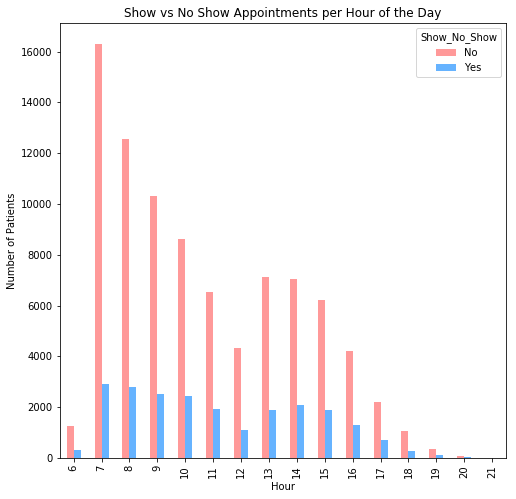

In [113]:
#Plotting the count of Show/ No Show per Hour 

colors = ['#ff9999','#66b3ff']
pd.crosstab( df.ScheduledHour, df.Show_No_Show).plot(kind='bar', color=colors, figsize=(8,8))
plt.title('Show vs No Show Appointments per Hour of the Day')
plt.xlabel("Hour")
plt.ylabel("Number of Patients")
plt.show()


By looking at the percent of No show appointments per Hour of the Day, 7 AM seems to be the most common hour to schedule appointments, however this is the time that shows the most NO show percent rate

### Research Question 4: Is the Age an important factor to predict if a patient will show up to their scheduled appointment? 

#### Inspecting Age Variable

In [114]:
#Inspecting Age variable
show['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [115]:
#Inspecting Age variable
no_show['Age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

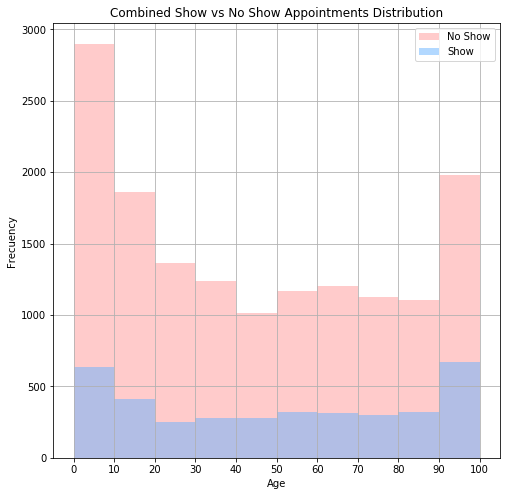

In [116]:
#Plotting Histogram
no_show.groupby('Show_No_Show').Age.hist(alpha=0.5, bins=range(11), label = 'No Show', color='#ff9999', figsize=(8,8))
show.groupby('Show_No_Show').Age.hist(alpha=0.5, bins = range(11), label = 'Show', color='#66b3ff', figsize=(8,8))
plt.title('Combined Show vs No Show Appointments Distribution')
plt.xlabel("Age")
plt.ylabel("Frecuency")
plt.xticks(range(11), ('0','10','20','30','40','50','60','70','80','90','100'))
plt.legend();

In [117]:
#Inspecting Age variable
#Gouping records in Group ages

Age_groups=[0,10,20,30,40,50,60,70,80,90,100]
df['Age_group'] = pd.cut(df['Age'], Age_groups, right=False)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_No_Show,ScheduledMonth,ScheduledDOW,ScheduledHour,Age_group
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,18,"[60, 70)"
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,16,"[50, 60)"
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,Friday,16,"[60, 70)"
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday,17,"[0, 10)"
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday,16,"[50, 60)"


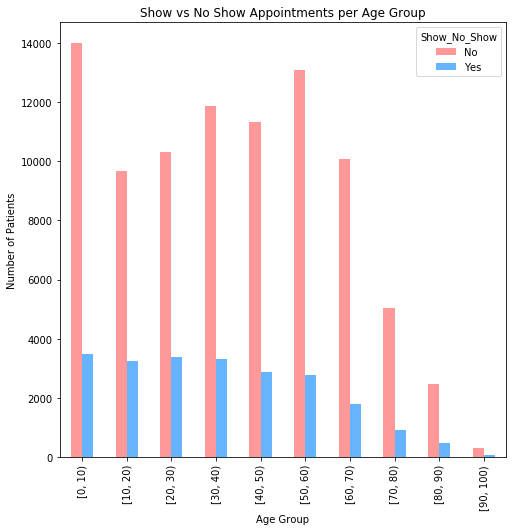

In [118]:
#Plotting the count of Show/ No Show per Age Group

colors = ['#ff9999','#66b3ff']
pd.crosstab( df.Age_group, df.Show_No_Show).plot(kind='bar', color=colors, figsize=(8,8))
plt.title('Show vs No Show Appointments per Age Group')
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.show()


In [119]:
#Using crosstab to get the count of Show/ No Show per Age
s_n_s_Age = pd.crosstab( df.Age_group, df.Show_No_Show)

#Calculating Percent of No_Show
s_n_s_Age['%_No_Show'] = s_n_s_Age['No']/( s_n_s_Age['No'] +  s_n_s_Age['Yes']) 
s_n_s_Age

Show_No_Show,No,Yes,%_No_Show
Age_group,,,
"[0, 10)",13991,3484,0.800629
"[10, 20)",9679,3257,0.748222
"[20, 30)",10319,3380,0.753267
"[30, 40)",11871,3300,0.782480
"[40, 50)",11329,2880,0.797312
"[50, 60)",13087,2776,0.825002
"[60, 70)",10086,1790,0.849276
"[70, 80)",5032,902,0.847995
"[80, 90)",2481,465,0.842159


By looking at the % of No show appointments per Age groups, In general Older patients between 50 and 90 show a higher NO show % rate than younger patients. 

### Research Question 5: Is SMS_received an important factor to predict if a patient will show up to their scheduled appointment? 

#### Inspecting SMS_received Variable

In [120]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

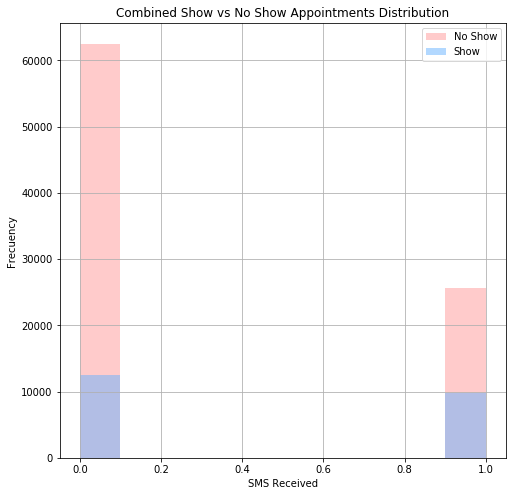

In [121]:
#Plotting Histogram
no_show.groupby('Show_No_Show').SMS_received.hist(alpha=0.5, label = 'No Show', color='#ff9999', figsize=(8,8))
show.groupby('Show_No_Show').SMS_received.hist(alpha=0.5, label = 'Show', color='#66b3ff', figsize=(8,8))
plt.title('Combined Show vs No Show Appointments Distribution')
plt.xlabel("SMS Received")
plt.ylabel("Frecuency")
plt.legend();

In [122]:
#Using crosstab to get the count of Show/ No Show per SMS received
s_n_s_SMS = pd.crosstab( df.SMS_received, df.Show_No_Show)

#Calculating Percent of No_Show
s_n_s_SMS['%_No_Show'] = s_n_s_SMS['No']/( s_n_s_SMS['No'] +  s_n_s_SMS['Yes']) 
s_n_s_SMS

Show_No_Show,No,Yes,%_No_Show
SMS_received,,,
0,62509,12535,0.832965
1,25698,9784,0.724255


By looking at the percent of No show appointments per SMS_received, it shows that the percent of patients that did NOT receive a SMS message and did NOT go to the appointment is higher than the percent of patients that received a SMS message and did not got to the appointment

<a id='conclusions'></a>
## Conclusions

It is important to mention that this project was focused on providing an exploratory analysis only and should be complemented with a more in depth and statistical modeling analysis in order to make accurate predictions.

My study was focused on exploring the No-show Variable along with the following factors: Gender, ScheduledDay (Month, Day of the week, hour), Age and SMS_received.

Below are my observations related to each variable:

>-  **Gender** variable and doing different type of explorations, I do not see a clear indication that Gender is an import factor to predict if Patients would show to their appointments or no.

>  The only thing we can clearly see from this dataset is that the ratio of Female Patients is higher than Male Patients, but not necesarily this means that Female are more likely to go their appointments than Male, since the Female/ Male Ratio for both Show and No-Show appointments are very similar:

>  **Show Ratio:** 65.4% F vs 34.6% M

>  **No-Show Ratio:** 64.9% F vs 35.1% M

>- **ScheduleMonth**: May(5) and June(6) are the months with the most NO show percent rate

>- **ScheduleDOW**: Monday and Saturday are the days with the most NO show percent rate

>- **ScheduleHour**: 7 AM seems to be the most common hour to schedule appointments, however this is the time that shows the most NO show percent rate

>- **Age_group**: In general Older patients between 50 and 90 show a higher NO show % rate than younger patients.

>- **SMS_received**: The percent of patients that did NOT receive a SMS message and did NOT go to the appointment is higher than the percent of patients that received a SMS message and did not got to the appointment



In [123]:
#Creating HTML File
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0